# **Decision Trees**

The Wisconsin Breast Cancer Dataset(WBCD) can be found here(https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data)

This dataset describes the characteristics of the cell nuclei of various patients with and without breast cancer. The task is to classify a decision tree to predict if a patient has a benign or a malignant tumour based on these features.

Attribute Information:
```
#  Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)
```

In [3]:
import pandas as pd
headers = ["ID","CT","UCSize","UCShape","MA","SECSize","BN","BC","NN","Mitoses","Diagnosis"]
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?',    
         header=None, index_col=['ID'], names = headers) 
data = data.reset_index(drop=True)
data = data.fillna(0)
print(data.describe())
print(data.head(5))

               CT      UCSize     UCShape          MA     SECSize          BN  \
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000   
mean     4.417740    3.134478    3.207439    2.806867    3.216023    3.463519   
std      2.815741    3.051459    2.971913    2.855379    2.214300    3.640708   
min      1.000000    1.000000    1.000000    1.000000    1.000000    0.000000   
25%      2.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      6.000000    5.000000    5.000000    4.000000    4.000000    5.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

               BC          NN     Mitoses   Diagnosis  
count  699.000000  699.000000  699.000000  699.000000  
mean     3.437768    2.866953    1.589413    2.689557  
std      2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.000000    2

In [4]:
data.columns

Index(['CT', 'UCSize', 'UCShape', 'MA', 'SECSize', 'BN', 'BC', 'NN', 'Mitoses',
       'Diagnosis'],
      dtype='object')

In [5]:
print(data.iloc[:5, :-1])
print(data.iloc[:5, -1])

   CT  UCSize  UCShape  MA  SECSize    BN  BC  NN  Mitoses
0   5       1        1   1        2   1.0   3   1        1
1   5       4        4   5        7  10.0   3   2        1
2   3       1        1   1        2   2.0   3   1        1
3   6       8        8   1        3   4.0   3   7        1
4   4       1        1   3        2   1.0   3   1        1
0    2
1    2
2    2
3    2
4    2
Name: Diagnosis, dtype: int64


COLUMNS:
	Index(['CT', 'UCSize', 'UCShape', 'MA', 'SECSize', 'BN', 'BC', 'NN', 'Mitoses',
       'Diagnosis'],
      dtype='object')

DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CT         699 non-null    int64  
 1   UCSize     699 non-null    int64  
 2   UCShape    699 non-null    int64  
 3   MA         699 non-null    int64  
 4   SECSize    699 non-null    int64  
 5   BN         699 non-null    float64
 6   BC         699 non-null    int64  
 7   NN         699 non-null    int64  
 8   Mitoses    699 non-null    int64  
 9   Diagnosis  699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB
	None


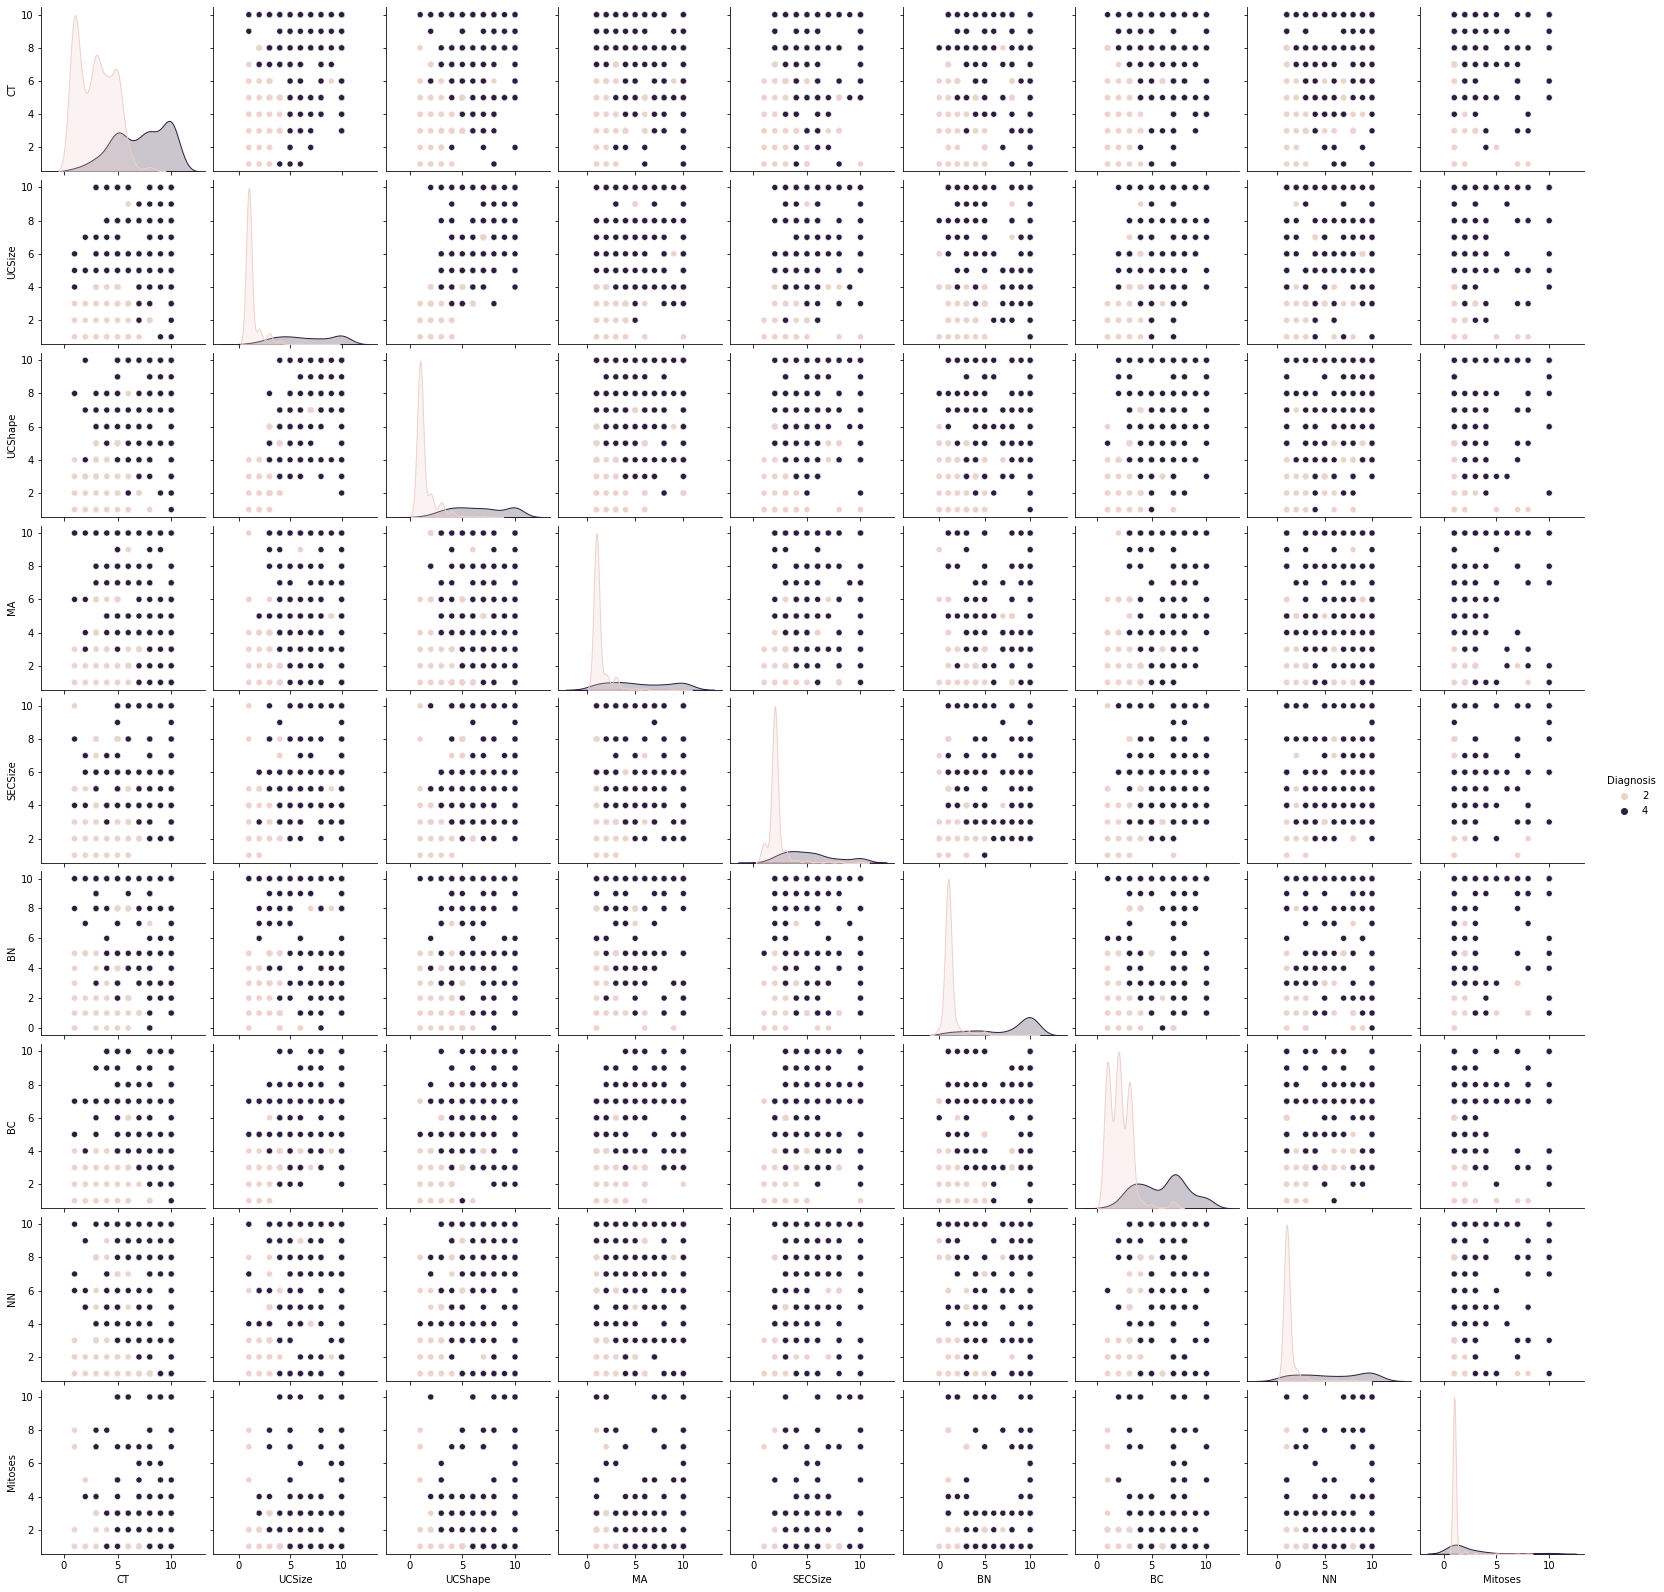

In [4]:
print('COLUMNS:\n\t{}'.format(data.columns))
print('='*100)
print('\nDATA INFO')
print('\t{}'.format(data.info()))
print('='*100)

import seaborn as sns
sns.pairplot(data, hue = 'Diagnosis')

1. a) Implement a decision tree (you can use decision tree implementation from existing libraries).

In [6]:
'''
Author: Vishal Reddy Mandadi
Roll Num: 2019101119
'''
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

class DecisionTree:
    def __init__(self, criterion='gini', termination_metric=None, termination_metric_value=None):
        '''
        Params:
        criterion: 'gini' or 'entropy'
        termination_metric: 'max_depth' or 'min_samples_split' or 'min_samples_leaf' or 
                            'max_leaf_nodes' or 'min_impurity_decrease' or 'min_impurity_split'
        termination_metric_value: Corresponding valid value
        '''

        self.model = None
        self.criterion = criterion
        self.termination_metric = termination_metric
        self.termination_metric_value = termination_metric_value

        if termination_metric=='max_depth':
            self.model = DecisionTreeClassifier(random_state=0, criterion=criterion, max_depth=termination_metric_value)
        elif termination_metric=='min_samples_split':
            self.model = DecisionTreeClassifier(random_state=0, criterion=criterion, min_samples_split=termination_metric_value)
        elif termination_metric=='min_samples_leaf':
            self.model = DecisionTreeClassifier(random_state=0, criterion=criterion, min_samples_leaf=termination_metric_value)
        elif termination_metric=='max_leaf_nodes':
            self.model = DecisionTreeClassifier(random_state=0, criterion=criterion, max_leaf_nodes=termination_metric_value)
        elif termination_metric=='min_impurity_decrease':
            self.model = DecisionTreeClassifier(random_state=0, criterion=criterion, min_impurity_decrease=termination_metric_value)
        elif termination_metric=='min_impurity_split':
            self.model = DecisionTreeClassifier(random_state=0, criterion=criterion, min_impurity_split=termination_metric_value)
        else:
            self.model = DecisionTreeClassifier(random_state=0, criterion=criterion)

    def train(self, X_train, y_train):
        self.model = self.model.fit(X_train, y_train)

    def test(self, X_test, y_test):
        y_predicted = self.model.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, y_predicted)
        f1_score = metrics.f1_score(y_test, y_predicted)
        precision = metrics.precision_score(y_test, y_predicted)
        recall = metrics.recall_score(y_test, y_predicted)
        result = {
            'accuracy': accuracy,
            'f1_score': f1_score,
            'precision': precision,
            'recall': recall
            # 'y_predicted': y_predicted,
            # 'y_true': y_test
        }
        return result

        
def convert_2_4_to_0_1_labels(y):
    return y/2 - 1

def convert_0_1_to_2_4_labels(y):
    return (y+1)*2

# Turn the class labels int 0 and 1 and divide the data into feature set and inferences
X = data.iloc[:, :-1]
y = convert_2_4_to_0_1_labels(data.iloc[:, -1]) # Initially, labels=(2, 4), Now, labels = (0, 1) # y = data.iloc[:, -1]/2 - 1
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80:20 split


1. b) Train a decision tree object of the above class on the WBC dataset using misclassification rate, entropy and Gini as the splitting metrics.

In [11]:
model_gini = DecisionTree(criterion='gini')
model_gini.train(X_train, y_train)
model_entropy = DecisionTree(criterion='entropy')
model_entropy.train(X_train, y_train)
print("Tree size/depth using Gini: {} and number of nodes: {}".format(model_gini.model.get_depth(), model_gini.model.tree_.node_count))
print("Tree size/depth using Entropy: {} and number of nodes: {}".format(model_entropy.model.get_depth(), model_entropy.model.tree_.node_count))

Tree size/depth using Gini: 9 and number of nodes: 63
Tree size/depth using Entropy: 9 and number of nodes: 51


1. c) Report the accuracies in each of the above splitting metrics and give the best result. 

In [12]:
result_gini = model_gini.test(X_test, y_test)
print("Results with Gini: \n{}".format(result_gini))
result_entropy = model_entropy.test(X_test, y_test)
print("Results with Entropy: \n{}".format(result_entropy))

Results with Gini: 
{'accuracy': 0.9285714285714286, 'f1_score': 0.8863636363636362, 'precision': 0.975, 'recall': 0.8125}
Results with Entropy: 
{'accuracy': 0.9357142857142857, 'f1_score': 0.9010989010989011, 'precision': 0.9534883720930233, 'recall': 0.8541666666666666}


# Analysing and selecting the best splitting metric
- From the results we see that accuracy produced by entropy-based splitting is marginally more than that of gini-based splitting
- But accuracy isn't a right metric to decide the quality of a classifier in medical cases
- The probability of detecting malignant cancer out of all the malignant cases should be as high as possible as human life is more important. It is ok to misclassify benign as malignant sometimes, but it is never ok to misclassify malignant as benign.
- Now, recall that 
    $$precision = \frac{true-positives}{true-positive + false-positives}$$
    $$recall = \frac{true-positives}{true-positive + false-negatives}$$
- So recall measures the probability of detection of malignancy correctly out of all the malignant cases. We want the classifier that has the highest recall to prevent misclassification of malignant cancer cases.
- Recall score of entropy model is more than the gini model
    $$recall_{entropy} > recall_{gini}$$
- Therefore entropy model is the best suited for our needs in this case as it has the best probability of detecting the malignant cancer given a set of malignant cases.

    **Answer: Entropy model is the best model for this medical data (for reason see the explanation above this line)**


1. d) Experiment with different approaches to decide when to terminate the tree (number of layers, purity measure, etc). Report and give explanations for all approaches. 

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_results(result_list, x_values, x_label):
    '''
    params: 
    result_list: [
                    {
                        'accuracy': ,
                        'f1_score': ,
                        'precision': ,
                        'recall': 
                    }, ...
                ]
    x_values: len(x_values)==len(result_list)
    '''
    if len(x_values)!=len(result_list):
        print("Mismatched x and y values, please check!!!")
        exit()
    accuracies = []
    f1 = []
    precision = []
    recall = []
    for result in result_list:
        accuracies.append(result['accuracy'])
        f1.append(result['f1_score'])
        precision.append(result['precision'])
        recall.append(result['recall'])

    titles = ['{} vs {}'.format(i, x_label) for i in ['Accuracy', 'F1 scores', 'Precision', 'Recall']]
    x_label = 'layer limits'
    y_labels = [i for i in ['Accuracy', 'F1 scores', 'Precision', 'Recall']]
    y = [accuracies, f1, precision, recall]
    fig, a =  plt.subplots(nrows=2,ncols=2, figsize=(8, 8))

    # print(titles[0])

    for i in range(2):
        a[i][0].plot(x_values, y[2*i])
        a[i][0].set_title(titles[2*i])
        a[i][0].set_xlabel(x_label)
        a[i][0].set_ylabel(y_labels[2*i])

        a[i][1].plot(x_values, y[2*i+1])
        a[i][1].set_title(titles[2*i+1])
        a[i][1].set_xlabel(x_label)
        a[i][1].set_ylabel(y_labels[2*i+1])

    # for i in range(4):
    #     a[i].plot((accuracies, x_values))
    #     a[i].title(titles[i])
    #     a[i].xlabel(x_label)
    #     a[i].ylabel(y_labels[i])
    fig.tight_layout()
    fig.show()

13
Best recall value obtained: 0.9166666666666666
Best recall's layer limit: 1
Tree size/depth using 12: 9 and number of nodes: 51
Tree size/depth using 7: 7 and number of nodes: 41
Result[7]: {'accuracy': 0.9428571428571428, 'f1_score': 0.9130434782608695, 'precision': 0.9545454545454546, 'recall': 0.875, 'model': <__main__.DecisionTree object at 0x7f5bdccd9a00>}


/tmp/ipykernel_6691/3044174290.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


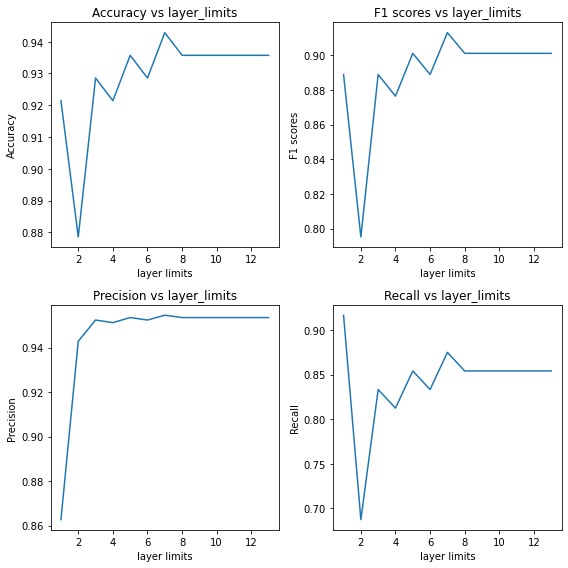

In [14]:
# Logging accuracy for different layer limits (max depth) as a factor to terminate tree expansion
results_layer_lims = []
layer_lims = [i for i in range(1, 14)]
best_recall_layer_lims = [-1, 0]
best_ind = None
for index, i in enumerate(layer_lims):
    model = DecisionTree(criterion='entropy', termination_metric='max_depth', termination_metric_value=i)
    model.train(X_train, y_train)
    result = model.test(X_test, y_test)
    result['model'] = model
    results_layer_lims.append(result)
    if result['recall'] > best_recall_layer_lims[1]:
        best_recall_layer_lims = [i, result['recall']]
        best_ind = index
print(len(layer_lims))
plot_results(results_layer_lims, x_values=layer_lims, x_label='layer_limits')
print("Best recall value obtained: {}\nBest recall's layer limit: {}".format(best_recall_layer_lims[1], best_recall_layer_lims[0]))
print("Tree size/depth using 12: {} and number of nodes: {}".format(results_layer_lims[12]['model'].model.get_depth(), results_layer_lims[12]['model'].model.tree_.node_count))
print("Tree size/depth using 7: {} and number of nodes: {}".format(results_layer_lims[6]['model'].model.get_depth(), results_layer_lims[6]['model'].model.tree_.node_count))
print("Result[7]: {}".format(results_layer_lims[6]))

19 19


/tmp/ipykernel_6691/3044174290.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Best recall value obtained: 0.875
Best recall's min samples split limit: 14
Tree size/depth using 1 as limit: 9 and number of nodes: 51
Tree size/depth using 10 as limit: 6 and number of nodes: 25
Result at i=10, that is, when min_samples_split=20: {'accuracy': 0.9428571428571428, 'f1_score': 0.9130434782608695, 'precision': 0.9545454545454546, 'recall': 0.875, 'model': <__main__.DecisionTree object at 0x7f5bd6470460>}


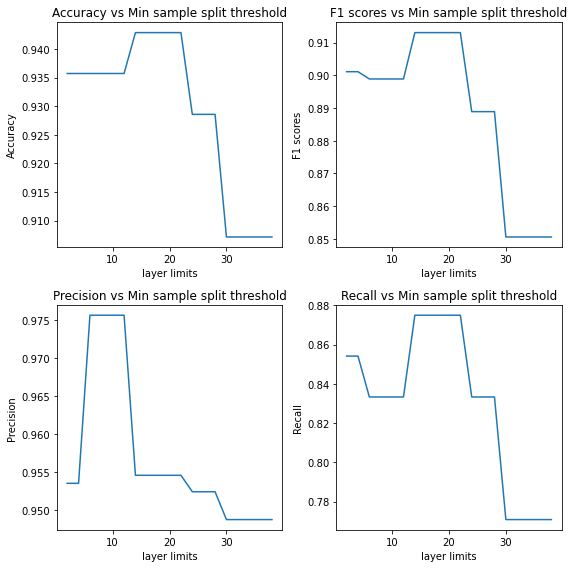

In [25]:
# Logging accuracy for different min_samples_splits as a factor to terminate tree expansion
results_min_samples_split = []
min_samples_splits = [2*i for i in range(1, 20)]
best_recall_min_samples_split = [-1, 0]
for i in min_samples_splits:
    model = DecisionTree(criterion='entropy', termination_metric='min_samples_split', termination_metric_value=i)
    model.train(X_train, y_train)
    result = model.test(X_test, y_test)
    result['model'] = model
    results_min_samples_split.append(result)
    if result['recall'] > best_recall_min_samples_split[1]:
        best_recall_min_samples_split = [i, result['recall']]
print(len(min_samples_splits), len(results_min_samples_split))
plot_results(results_min_samples_split, x_values=min_samples_splits, x_label='Min sample split threshold')
print("Best recall value obtained: {}\nBest recall's min samples split limit: {}".format(best_recall_min_samples_split[1], best_recall_min_samples_split[0]))
print("Tree size/depth using 1 as limit: {} and number of nodes: {}".format(results_min_samples_split[0]['model'].model.get_depth(), results_min_samples_split[0]['model'].model.tree_.node_count))
print("Tree size/depth using 10 as limit: {} and number of nodes: {}".format(results_min_samples_split[10]['model'].model.get_depth(), results_min_samples_split[10]['model'].model.tree_.node_count))
print("Result at i=10, that is, when min_samples_split=20: {}".format(results_min_samples_split[10]))

19 19


/tmp/ipykernel_6691/3044174290.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Best recall value obtained: 0.875
Best recall's min samples leaf limit: 8
Tree size/depth using 0: 9 and number of nodes: 47
Tree size/depth using 8: 5 and number of nodes: 17
Result at i=4, that is when min_samples is set to 8: {'accuracy': 0.9428571428571428, 'f1_score': 0.9130434782608695, 'precision': 0.9545454545454546, 'recall': 0.875, 'model': <__main__.DecisionTree object at 0x7f5bd61dbf10>}


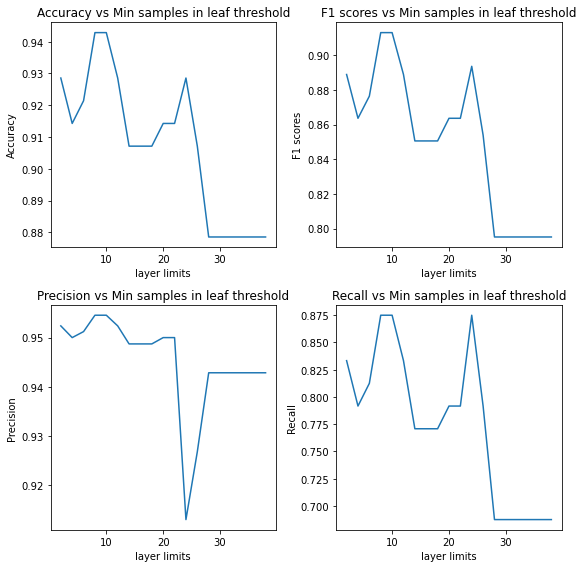

In [24]:
# Logging accuracy for different min_samples_leaf as a factor to terminate tree expansion
results_min_samples_leaf = []
min_samples_leaf = [2*i for i in range(1, 20)]
best_recall_min_samples_leaf = [-1, 0]
for i in min_samples_leaf:
    model = DecisionTree(criterion='entropy', termination_metric='min_samples_leaf', termination_metric_value=i)
    model.train(X_train, y_train)
    result = model.test(X_test, y_test)
    result['model'] = model
    results_min_samples_leaf.append(result)
    if result['recall'] > best_recall_min_samples_leaf[1]:
        best_recall_min_samples_leaf = [i, result['recall']]
print(len(min_samples_leaf), len(results_min_samples_leaf))
plot_results(results_min_samples_leaf, x_values=min_samples_leaf, x_label='Min samples in leaf threshold')
print("Best recall value obtained: {}\nBest recall's min samples leaf limit: {}".format(best_recall_min_samples_leaf[1], best_recall_min_samples_leaf[0]))
print("Tree size/depth using 0: {} and number of nodes: {}".format(results_min_samples_leaf[0]['model'].model.get_depth(), results_min_samples_leaf[0]['model'].model.tree_.node_count))
print("Tree size/depth using 8: {} and number of nodes: {}".format(results_min_samples_leaf[8]['model'].model.get_depth(), results_min_samples_leaf[8]['model'].model.tree_.node_count))
print("Result at i=4, that is when min_samples is set to 8: {}".format(results_min_samples_leaf[4]))


19 19
Best recall value obtained: 0.9166666666666666
Best recall's max_leaf_nodes limit: 2
Tree size/depth using 0: 1 and number of nodes: 3
Tree size/depth using 15: 10 and number of nodes: 53


/tmp/ipykernel_6691/3044174290.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


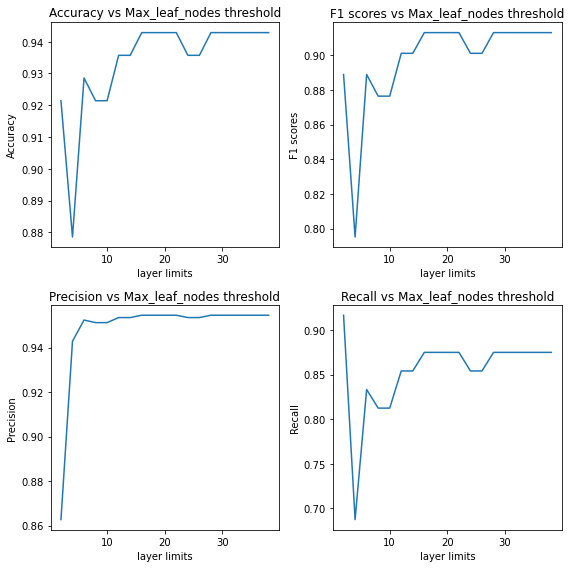

In [17]:
# Logging accuracy for different max_leaf_nodes as a factor to terminate tree expansion
results_max_leaf_nodes = []
max_leaf_nodes = [2*i for i in range(1, 20)]
best_recall_max_leaf_nodes = [-1, 0]
for i in max_leaf_nodes:
    model = DecisionTree(criterion='entropy', termination_metric='max_leaf_nodes', termination_metric_value=i)
    model.train(X_train, y_train)
    result = model.test(X_test, y_test)
    result['model'] = model
    results_max_leaf_nodes.append(result)
    if result['recall'] > best_recall_max_leaf_nodes[1]:
        best_recall_max_leaf_nodes = [i, result['recall']]
print(len(max_leaf_nodes), len(results_max_leaf_nodes))
plot_results(results_max_leaf_nodes, x_values=max_leaf_nodes, x_label='Max_leaf_nodes threshold')
print("Best recall value obtained: {}\nBest recall's max_leaf_nodes limit: {}".format(best_recall_max_leaf_nodes[1], best_recall_max_leaf_nodes[0]))
print("Tree size/depth using 0: {} and number of nodes: {}".format(results_max_leaf_nodes[0]['model'].model.get_depth(), results_max_leaf_nodes[0]['model'].model.tree_.node_count))
print("Tree size/depth using 15: {} and number of nodes: {}".format(results_max_leaf_nodes[15]['model'].model.get_depth(), results_max_leaf_nodes[15]['model'].model.tree_.node_count))


199 199


/tmp/ipykernel_6691/3044174290.py:54: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


Best recall value obtained: 0.9166666666666666
Best recall's min_impurity_decrease limit: 0.07291666666666667


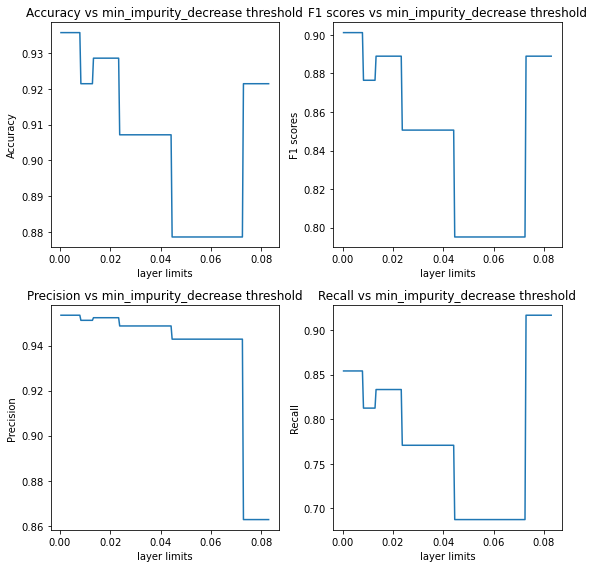

In [18]:
# Logging accuracy for different min_impurity_decrease as a factor to terminate tree expansion
results_min_impurity_decrease = []
min_impurity_decrease = [i/2400 for i in range(1, 200)]
best_recall_min_impurity_decrease = [-1, 0]
for i in min_impurity_decrease:
    model = DecisionTree(criterion='entropy', termination_metric='min_impurity_decrease', termination_metric_value=i)
    model.train(X_train, y_train)
    result = model.test(X_test, y_test)
    result['model'] = model
    results_min_impurity_decrease.append(result)
    if result['recall'] > best_recall_min_impurity_decrease[1]:
        best_recall_min_impurity_decrease = [i, result['recall']]
print(len(min_impurity_decrease), len(results_min_impurity_decrease))
plot_results(results_min_impurity_decrease, x_values=min_impurity_decrease, x_label='min_impurity_decrease threshold')
print("Best recall value obtained: {}\nBest recall's min_impurity_decrease limit: {}".format(best_recall_min_impurity_decrease[1], best_recall_min_impurity_decrease[0]))

/home/vishal/anaconda3/envs/smai/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/home/vishal/anaconda3/envs/smai/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
/home/vishal/anaconda3/envs/smai/lib/python3.8/site-packages/sklearn/tree/_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_dec

19 19
Best recall value obtained: 0.9166666666666666
Best recall's min_impurity_split limit: 0.65


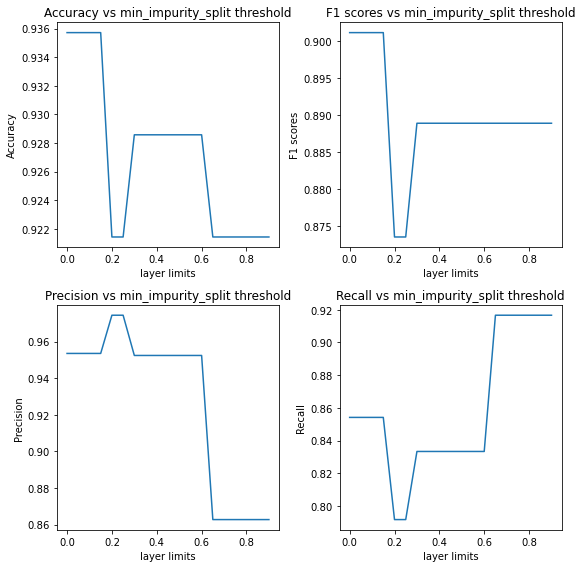

In [19]:
# Logging accuracy for different min_impurity_split as a factor to terminate tree expansion
results_min_impurity_split = []
min_impurity_split = [i/20 for i in range(0, 19)]
best_recall_min_impurity_split = [-1, 0]
for i in min_impurity_split:
    model = DecisionTree(criterion='entropy', termination_metric='min_impurity_split', termination_metric_value=i)
    model.train(X_train, y_train)
    result = model.test(X_test, y_test)
    result['model'] = model
    results_min_impurity_split.append(result)
    if result['recall'] > best_recall_min_impurity_split[1]:
        best_recall_min_impurity_split = [i, result['recall']]
print(len(min_impurity_split), len(results_min_impurity_split))
plot_results(results_min_impurity_split, x_values=min_impurity_split, x_label='min_impurity_split threshold')
print("Best recall value obtained: {}\nBest recall's min_impurity_split limit: {}".format(best_recall_min_impurity_split[1], best_recall_min_impurity_split[0]))

# Analysis of various approaches to early stopping or terminating the tree growth
(Q: 1. d) Experiment with different approaches to decide when to terminate the tree (number of layers, purity measure, etc). Report and give explanations for all approaches.)
1. Max depth:
    - Terminates the tree growth when its depth reaches the max depth parameter. From the graphs above, it can be seen the max depth provides the highest accuracy, highest precision and 2nd highest recall when max_depth is set to 7. If allowed to grow unconstrained, it grows up to 9 and for which the recall and accuracy aren't good enough (while precision is marginally higher). This shows that as the tree size is allowed to grow higher and higher, it started overfitting to training data. That's why, at a depth 9, its accuracy on test data got lower. So, early stopping the tree growth, in this case, at 6 seems to be the best option.
    - Not a good metric as the graph wasn't monotonous for larger intervals. Non-monotonous trends cannot be interpreted easily and are not intuitive. And we cannot plot graphs in cases where the depth is really high and where trainig takes very long time. We should be able to make an intelligent guess, but here, it is a bit difficult and random.
2. Min samples split:
    - This terminates splitting process in a branch when the number of samples in a node is less than or equal to this parameter value. Here from the generated graphs, we can see that the precision rises high up in the initial phase and then descends a bit while recall sees rise at a different point. The overall accuracy too rises up at a later stage (when recall was on rise while precision was on fall). The trend indicates that initially, the splits were too many due to which, the model overfit to the data. Therefore, the accuracy was a bit low, while precision was higher. As we increased the split limit gradually there was an early stopping scenario (stopping at depth 6 (25 nodes) instead of 9 (51 nodes)) which produced regularization effect and hence accuracy increased. This method produced better (accuracy, recall) pair when compared to max_depth control. However, precision was a bit low.
    - This is a good metric to use as the graph is region-wise monotonous for wider regions, predictable and interpretable. This implies that small changes (neigbhoring values) in the params do not effect the performance to a great extent. This is quintessential to making intelligent guesses as we don't need to worry about unfortunate falls that we've seen in max_depth
3. Min_samples_leaf:
    - This terminates splitting process in a branch when the number of samples in an about to form child node is less than or equal to this parameter value. This has almost similar effects as min_samples_split parameter.
    - This is ok but not as good a metric as min_samples_split because there were multiple rises and falls in the graph. This implies that the relation between this metric and optimal tree is highly non-linear so making intelligent guesses will not always work.
4. Max leaf nodes:
    - Terminates when the number of leaf nodes reach this value. The trends in the graphs look relatively stable and almost roughly monotonous with fewer exceptions. 
    - This is not as good as min_samples_split. In fact, if we increase the resolution of the graph, we will see more ups and downs. It is also less intuitive than max_depth. 
5. Min impurity decrease:
    - Terminates when the decrease in the impurity at a particular node is lower than threshold. The graph looks very stable and monotonous with only one perturbation which too is a minor one
    - Out of all the above metrics so far, this had the largest region of monotonicity. With very minor perturbations even at higher graph resolution (hardly more than 1) this parameter is more explainable and intuitive than the rest (on performance not, it is almost on equal footing with min_samples_split)
    - This therefore is an ideal one to decide tree termination for most application cases
6. Min impurity split:
    - Terminates or prunes out the nodes which have impurity less than this parameter's value. The graph looks stable and monotonous but has the following problems:
        1. It is difficult to detect the impurity range where possible changes can be made. 
        2. It is difficult to infer or make intelligent guesses in case of floating numbers as the range is too wide. Also, it is not directly possible to check for the range where difference in the performances occur so this will be too data-dependent 
    - Therefore, not a good enough metric and is often outperformed by Min_impurity_decrease. Both (5) and (6) have similar graphs but (6) comes with additional clutches mentioned above.

In conclusion, max_depth, max_samples_split, and min_impurity_decrease look very ideal parameters to control the tree termination. What to use depends also on the given problem and the tradeoffs the developer is ready to take. 

In [22]:
'''
'max_depth' or 'min_samples_split' or 'min_samples_leaf' or 
'max_leaf_nodes' or 'min_impurity_decrease' or 'min_impurity_split'
'''

"\n'max_depth' or 'min_samples_split' or 'min_samples_leaf' or \n'max_leaf_nodes' or 'min_impurity_decrease' or 'min_impurity_split'\n"

2. What is boosting, bagging and  stacking?
Which class does random forests belong to and why?

Answer:
1. Bagging
    - Bagging is an ensemble method in machine learning, commonly used with decision trees, used to reduce the variance in the ML model. In bagging, we create multiple models usign datasets formed by selecting a certain number of data points with replacement from the original dataset. Since data can repeat itself in the new data subsets, the distribution of these subsets will no longer be similar to the original datasets. So, training on such different subsets will generate different models. Therefore, we train the models with each model getting a new data set via method described above. After that, we use all these to predict the final outcome
    - In case of classification trees, we generally use the label that appears as outcome from max number of models as the final output
    - In regression trees, we take the average of all the outcomes comming from different models
    - Goal is to reduce variance in the model performances
2. Boosting
    - Boosting is another ensemble method and is an extension to the boosting method. In boosting, each model is trained on the prior knowledge of previous model. So basically, if a model is trained on original dataset with n samples and misclassify k samples in it, then the next model will be trained with a dataset that contains all the samples, but the k samples that were misclassified before will be given more weightage. This way we continuosly train weak learners one over another to finally produce a strong learner which will be able to produce very high accuracy.
    - Goal is to reduce bias in the models
3. Stacking
    - In stacking, another ensemble method, we use heterogeneous learners, that is, we use different models each with different learning algorithms as opposed to homogeneous learners used in Bagging and Boosting. So, we create multiple such models with different learning algorithms for each, and then train them on the common parent dataset. These models are then connected to a meta-model which takes inferences from all these and produce the final prediction. This is a 2 layer stacking. We can do multi-layer stacking as well.

    Random forests belong to bagging class. In random forests, along with bootstrap sampling, we also apply some random restrictions on feature selection for splitting at each node. This is done by selecting a random set of features at each node, and then only allowing the algorithm to choose the best feature for split from this smaller subset. 

3. Implement random forest algorithm using different decision trees . 

In [4]:
'''
Random Forests implementation (SMAI)
Author: Vishal Reddy Mandadi

1. Decision tree data structure:
    Node: {f_index, f_value, left, right, groups: (left_group_dataset, right_group_dataset)}

2. Assume that the class labels are known - 2, 4
'''
import random


class DecisionTree:
    def __init__(self, train=None, max_depth=10, min_size=10, n_features_for_split=4):
        '''
        min_size: minimum number of samples required to consider splitting further
        n_features_for_split - if = -1, implies normal decision trees, otherwise random forests with 
            given number of features for splitting
        train: list()
        '''
        self.train = train
        self.max_depth = 10
        self.min_size = 10
        self.n_features_for_split = n_features_for_split
        self.root = self.get_split(self.train)
        self.build_tree(self.root, depth=1)

    def split(self, data, f_index, f_value):
        left = []
        right = []
        for row in data:
            if row[f_index] < f_value:
                left.append(row)
            else:
                right.append(row)
        return left, right

    def gini(self, left, right):
        class_labels = [2, 4]
        label_counts_left = [0, 0]
        label_counts_right = [0, 0]
        for row in left:
            if row[-1] == 2:
                label_counts_left[0] += 1
            else:
                label_counts_left[1] += 1
        for row in right:
            if row[-1] == 2:
                label_counts_right[0] += 1
            else:
                label_counts_right[1] += 1
        gini_impurity = 0
        total_left = label_counts_left[0]+label_counts_left[1]
        total_right = label_counts_right[0]+label_counts_right[1]
        for i in range(2):
            p_l = 0
            p_r = 0
            if total_left != 0:
                p_l = label_counts_left[i]/total_left
            if total_right != 0:
                p_r = label_counts_right[i]/total_right
            gini_impurity += p_l*(1-p_l) + p_r*(1-p_r)
        return gini_impurity

    def get_split(self, data):
        '''
        Applying random forest algorithm (selecting best split from a random subset of features)
        '''
        features = []  # set of indices of chosen features
        for i in range(len(data[0])):
            if len(features) > self.n_features_for_split:
                break
            index = random.randint(0, len(data[0])-1)
            while index in features:
                index = random.randint(0, len(data[0])-1)
            features.append(index)

        # Brute force greedy search for best split point
        min_gini_score = 1000
        min_f_index = 1000
        min_f_value = 1000
        min_groups = None
        for f_index in features:
            for row in data:
                f_value = row[f_index]  # data[row][f_index]
                groups = self.split(data, f_index, f_value)
                gini_score = self.gini(groups[0], groups[1])
                if gini_score < min_gini_score:
                    min_gini_score = gini_score
                    min_f_index = f_index
                    min_f_value = f_value
                    min_groups = groups
        return {'f_index': min_f_index, 'f_value': min_f_value, 'groups': groups}

    def get_outcome(self, data):
        label_list = [0, 0]
        for row in data:
            if row[-1] == 2:
                label_list[0] += 1
            elif row[-1] == 4:
                label_list[1] += 1
            else:
                print("ERROR, label: {}".format(label_list))
                exit(1)
        if label_list[0] > label_list[1]:
            outcome = 2
        else:
            outcome = 4
        return outcome

    def build_tree(self, node, depth):
        left, right = node['groups']
        del(node['groups'])
        group = left + right

        # check for a no split
        if not left or not right:
            node['left'] = node['right'] = self.get_outcome(left+right)
            return
        # check for max depth
        if depth >= self.max_depth:
            node['left'], node['right'] = self.get_outcome(
                left), self.get_outcome(right)
            return
        # process left child
        if len(left) <= self.min_size:
            node['left'] = self.get_outcome(left)
        else:
            node['left'] = self.get_split(left)
            self.build_tree(node['left'], depth+1)
        # process right child
        if len(right) <= self.min_size:
            node['right'] = self.get_outcome(right)
        else:
            node['right'] = self.get_split(right)
            self.build_tree(node['right'], depth+1)

    def predict(self, x):
        node = self.root
        while type(node) == dict:
            if x[node['f_index']] < node['f_value']:
                node = node['left']
                if type(node) == dict:
                    continue
                else:
                    return node
            else:
                node = node['right']
                if type(node) == dict:
                    continue
                else:
                    return node
        return node


def bootstrap_samples(train, fraction_of_samples):
    total_num_samples = int(fraction_of_samples*len(train))
    sample = []
    for i in range(total_num_samples):
        d_index = random.randint(0, len(train)-1)
        sample.append(train[d_index])
    return sample


def random_forest_predict(trees, row):
    predictions = [tree.predict(row) for tree in trees]
    return max(set(predictions), key=predictions.count)

    # return max(set(predictions), key=predictions.count)

# Random Forest Algorithm


def random_forest(train, test, max_depth, min_size, fraction_of_samples, n_trees, n_features):
    trees = list()
    for i in range(n_trees):
        sample = bootstrap_samples(train, fraction_of_samples)
        # build_tree(sample, max_depth, min_size, n_features)
        tree = DecisionTree(sample, max_depth, min_size,
                            n_features_for_split=4)
        trees.append(tree)
    predictions = [random_forest_predict(trees, row) for row in test]
    n_correct = 0
    n_of_twos = 0
    for i in range(len(predictions)):
        if predictions[i]==test[i][-1]:
            n_correct += 1
        if predictions[i]==2:
            n_of_twos += 1
    accuracy = (n_correct*100)/len(predictions)
    p_2 = (n_of_twos*100)/len(predictions)
    print("Accuracy: {}\npercentage of 2s: {}".format(accuracy, p_2))
    
    return 0 # (predictions)


In [5]:
# X_train2 = list(X_train.to_numpy())
# X_test2 = list(X_test.to_numpy())
# type(X_train2)
data_with_labels = list(data.to_numpy())

In [6]:
data_with_labels[0][-1]

2.0

In [8]:
data.shape

(699, 10)

In [17]:
random_forest(data_with_labels, data_with_labels, max_depth=15, min_size=10, fraction_of_samples=1.0, n_trees=10, n_features=10)

Accuracy: 94.70672389127324
percentage of 2s: 70.81545064377683


0

4. Report the accuracies obtained after using the Random forest algorithm and compare it with the best accuracies obtained with the decision trees. 

# 4. Answer: Accuracies
For DTs, the best accuracy I got is: 94.28%
From Random forest, the best I got is: 94.70 (Got this after hypertuning several parameteres).

Random forest did seem to have performed better than naive Decision trees due to bagging and random forest algorithms.

5. Submit your solution as a separate pdf in the final zip file of your submission


Compute a decision tree with the goal to predict the food review based on its smell, taste and portion size.

(a) Compute the entropy of each rule in the first stage.

(b) Show the final decision tree. Clearly draw it.

Submit a handwritten response. Clearly show all the steps.

